In [10]:
# Temprorary fix for https://github.com/IRkernel/IRkernel/issues/145 https://github.com/jupyter/nbviewer/issues/453
options(jupyter.plot_mimetypes = 'image/png')

# Top baseline scores by fields

In [11]:
library(reshape2)
library(ggplot2)

Warning message:
: Removed 53 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 77 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 2 rows containing non-finite values (stat_boxplot).

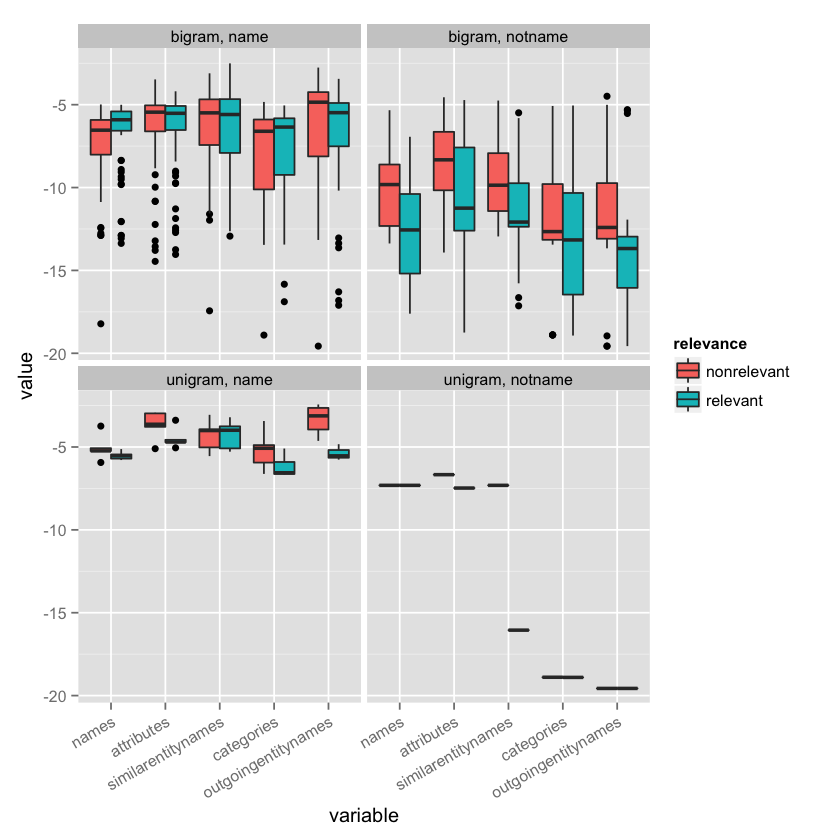

In [12]:
data <- read.table("../output/experiments/baseline_scores/baseline_scores.tsv", header = TRUE, sep = "\t")
namequeries <- read.table("../data/sigir2013-dbpedia/unibigrams-named.tsv", header = TRUE, sep = "\t")
fields = c("names" , "attributes" , "similarentitynames" , "categories" , "outgoingentitynames")
data <- merge(data, namequeries)
dataMelt <- melt(data, id = c("type", "qid", "tokens", "text", "name", "relevance"), measure.vars = fields)
ggplot(dataMelt, aes(y=value, x = variable, fill=relevance)) + geom_boxplot() + facet_wrap(~type+name) +
  theme(axis.text.x=element_text(angle=30,hjust=1))

# Feature values by concept types

[1] 3107   11


Warning message:
: Removed 427 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 270 rows containing non-finite values (stat_boxplot).

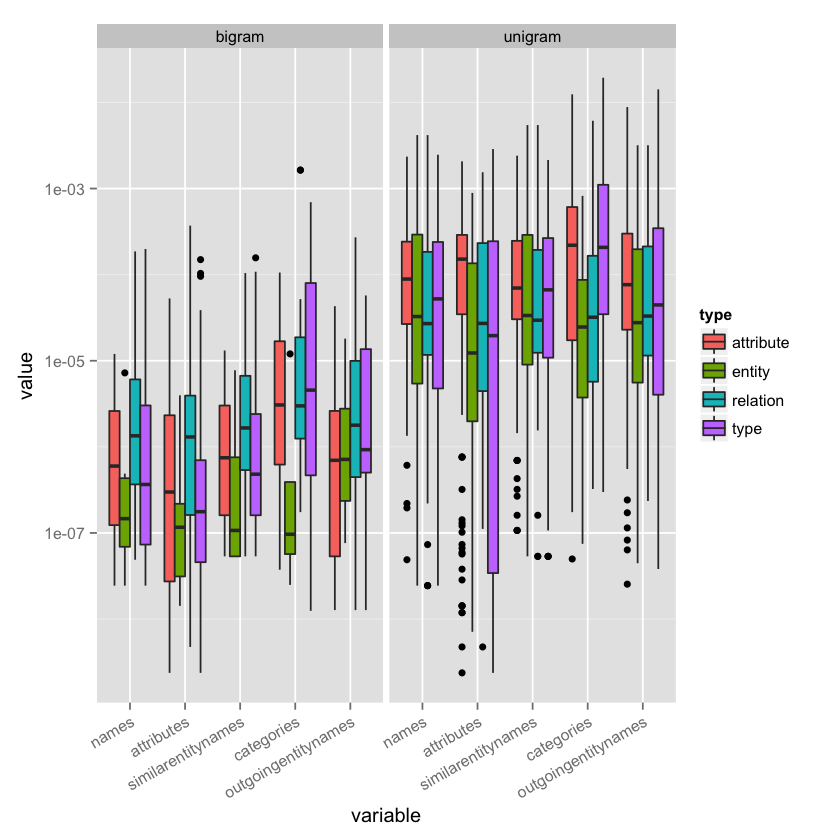

In [13]:
library(reshape2)
library(ggplot2)
library(dplyr)

fields = c("names" , "attributes" , "similarentitynames" , "categories" , "outgoingentitynames")

tsvPath <- commandArgs(TRUE)[1]
outputPlot <- commandArgs(TRUE)[2]

data <- read.table('../output/experiments/feature_values/fieldlikelihood.tsv', header = TRUE, sep = "\t")
data$rownumber = 1:nrow(data)

gramtypes <- read.table("../data/sigir2013-dbpedia/unibigrams-types.tsv", header = TRUE, sep = "\t", quote = "")
gramtypes$rownumber = 1:nrow(gramtypes)

dataMerged <- merge(data, gramtypes, by = c("rownumber", "qid", "gram"))
print(dim(dataMerged))
dataMelt <- melt(dataMerged, id = c("ngramtype", "qid", "gram", "text", "type"), measure.vars = fields)
dataFilter <- filter(dataMelt, type != "", type != "unsure", type != "none")

ggplot(dataFilter, aes(y=value, x = variable, fill = type)) + geom_boxplot() + facet_wrap(~ngramtype) +
  theme(axis.text.x=element_text(angle=30,hjust=1)) + scale_y_log10()

# Featrues values exploration

In [14]:
library(tidyr)

In [15]:
features.values <- read.table("..//output//features_values.tsv", header = TRUE, sep = "\t")
features.values$id <- rep(1:(nrow(features.values)/3), each=3)
features.values.wide <- spread(features.values, featurename, featurevalue)

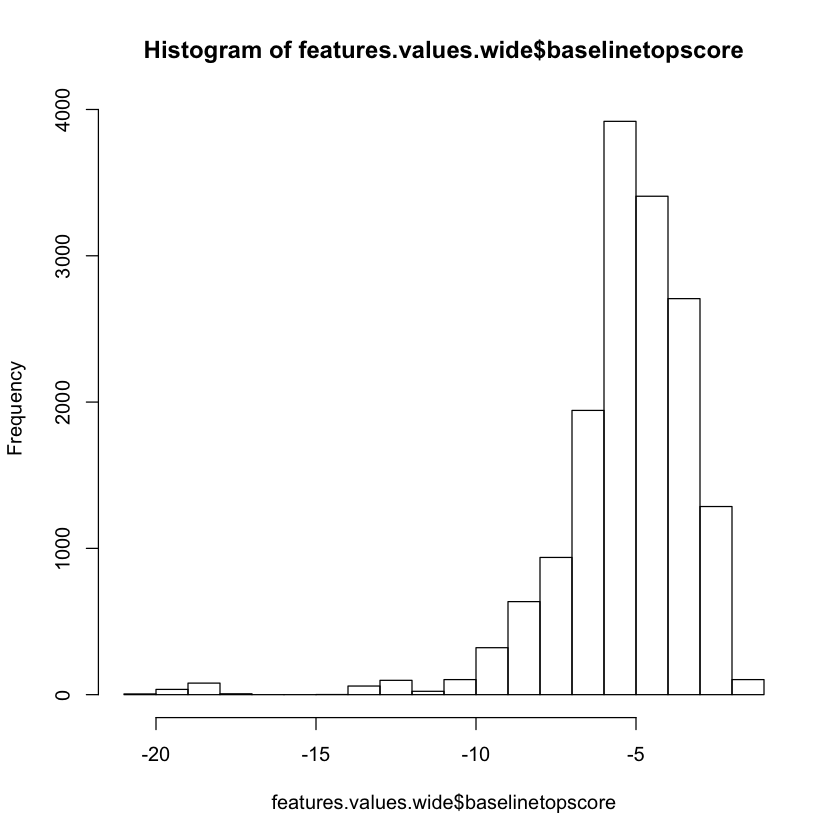

In [16]:
hist(features.values.wide$baselinetopscore)

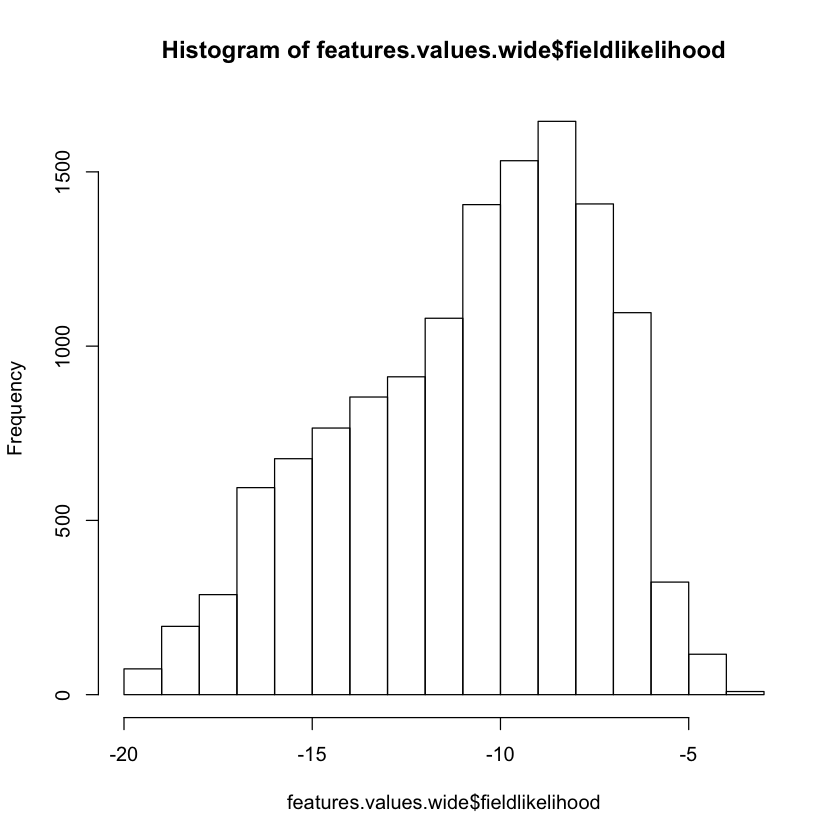

In [17]:
hist(features.values.wide$fieldlikelihood)

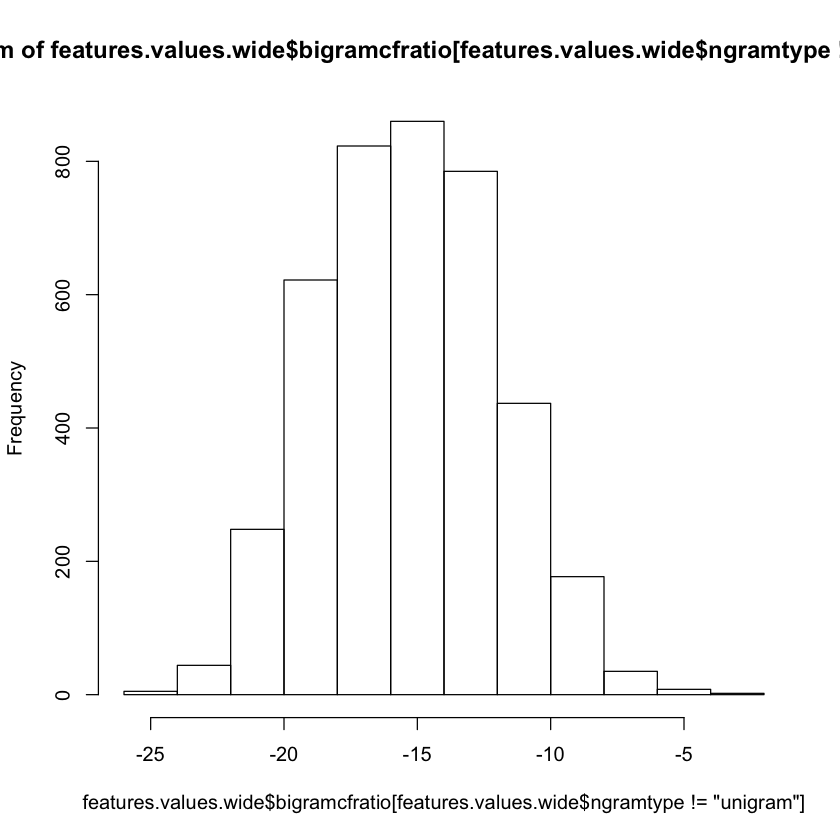

In [18]:
hist(features.values.wide$bigramcfratio[features.values.wide$ngramtype != "unigram"])

In [19]:
min(features.values.wide$fieldlikelihood[features.values.wide$fieldlikelihood != -Inf])

[1] -19.86039

In [20]:
max(features.values.wide$fieldlikelihood)

[1] -3.443176

In [21]:
min(features.values.wide$baselinetopscore[features.values.wide$baselinetopscore != -Inf])

[1] -20.55354

In [22]:
max(features.values.wide$baselinetopscore)

[1] -1.212117

In [23]:
min(features.values.wide$bigramcfratio[features.values.wide$bigramcfratio != -Inf & features.values.wide$ngramtype != "unigram"])

[1] -24.87662

In [24]:
max(features.values.wide$bigramcfratio[features.values.wide$ngramtype != "unigram"])

[1] -3.178054